# Comparison of Financial Models for Stock Price Prediction
1.ARIMA<br>
2.Stochastic process-geometric Brownian motion <br>
3.Artificial Neural Network <br>

<h2> ARIMA(Auto-Regressive Integrated Moving Average)</h2>
A time series Yt is said to follow an ARIMA(p,d.q) model if the dth difference Wt = (delta)^d*Yt is a stationary ARMA(p,q) process <br>
 Wt = φ1*Wt−1 + φ2*Wt−2 + . . . + φp*Wt−p + et + θ1*et−1 + θ2*et−2 + . . . + θq*et−q 

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
from pandas import DataFrame
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


<bound method NDFrame.head of             Date    Close     Open     High      Low   Output
0     02/24/2022  4288.70  4155.77  4294.73  4114.65  4221.51
1     02/23/2022  4225.50  4324.93  4341.51  4221.51  4267.11
2     02/22/2022  4304.76  4332.74  4362.12  4267.11  4327.22
3     02/18/2022  4348.87  4384.57  4394.60  4327.22  4373.81
4     02/17/2022  4380.26  4456.06  4456.06  4373.81  4429.68
...          ...      ...      ...      ...      ...      ...
2545  03/05/2012  1364.33  1369.59  1369.59  1359.13  1366.42
2546  03/02/2012  1369.63  1374.09  1374.53  1366.42  1365.90
2547  03/01/2012  1374.09  1365.90  1376.17  1365.90  1363.81
2548  02/29/2012  1365.68  1372.20  1378.04  1363.81  1365.97
2549  02/28/2012  1372.18  1367.56  1373.09  1365.97  1354.92

[2550 rows x 6 columns]>


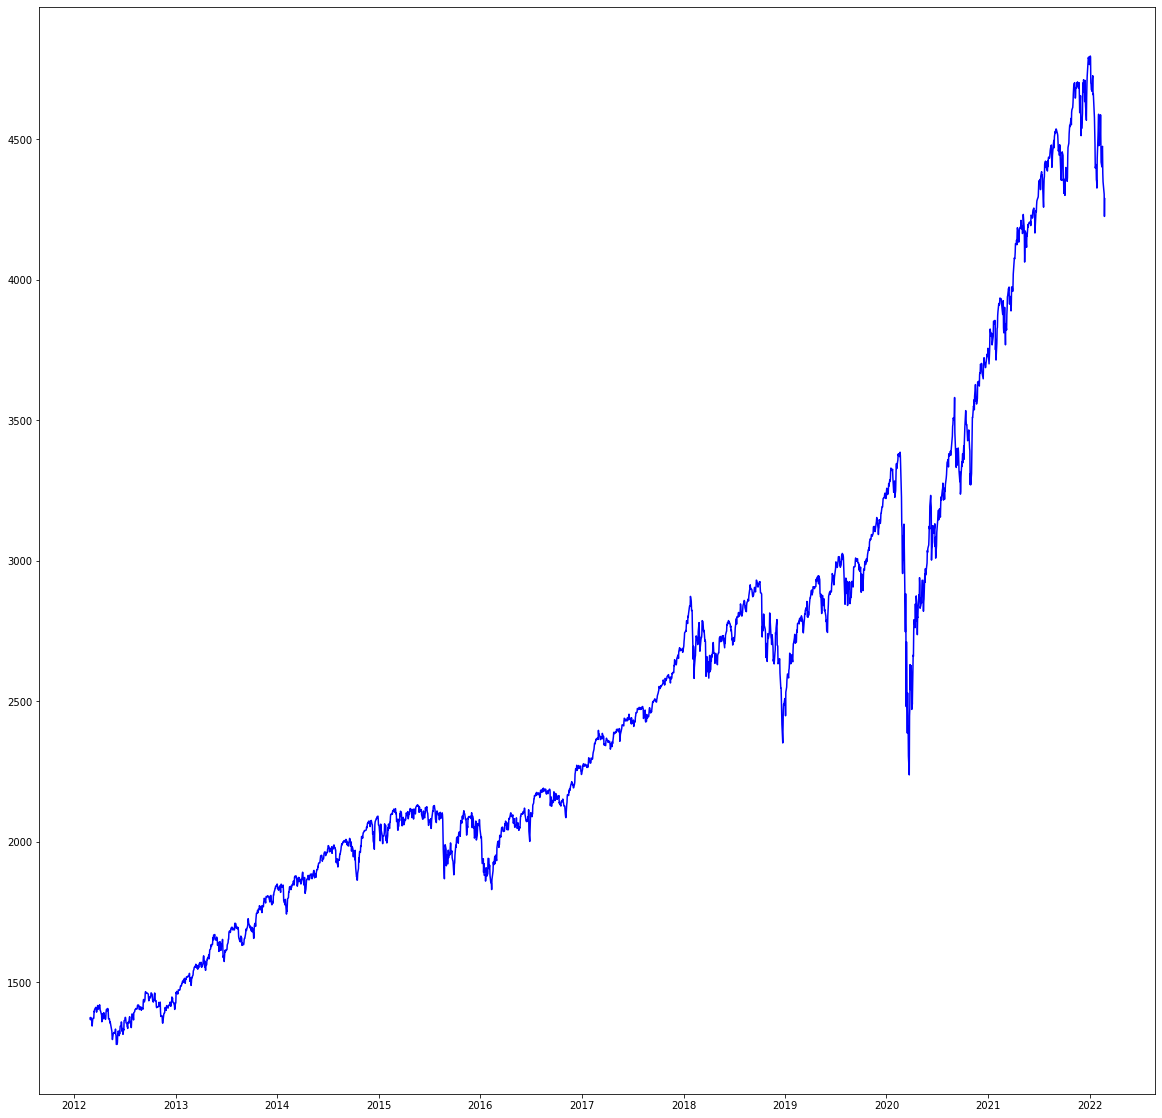

In [7]:
Apple = pd.read_csv("Data.csv")
print(Apple.head)
date_time = pd.to_datetime(Apple['Date'])
plt.figure(figsize=(20,20))
plt.plot( date_time,Apple['Close'],color = 'b')
plt.show()

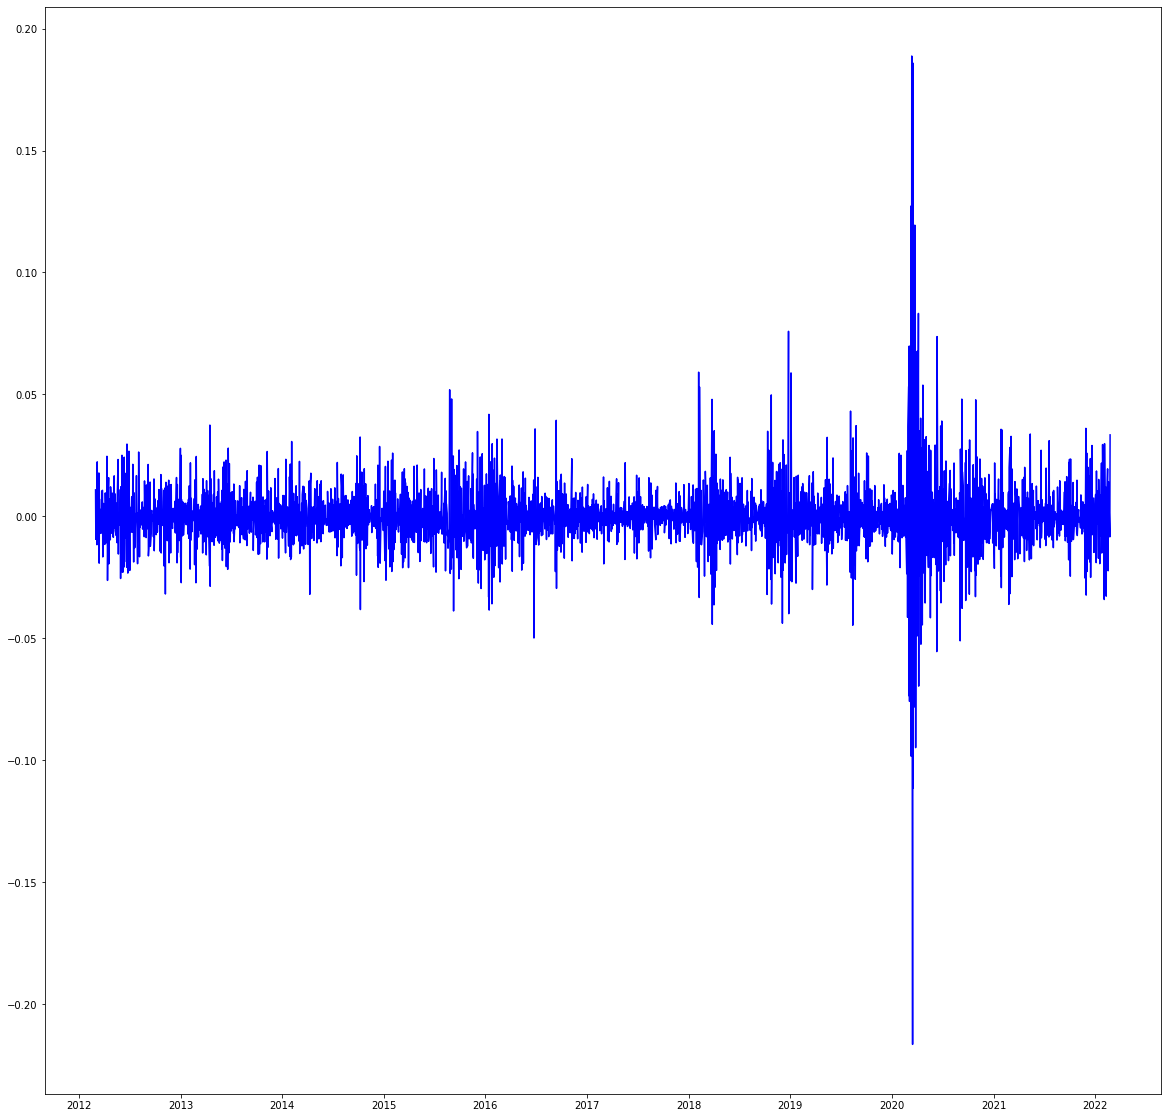

In [30]:
# Yt = np.log(Apple['close'])
Yt = Apple['Close']
Yt = np.log(Yt)
# print(len(Yt))
wt = []
for i in range(2,len(Yt)):
    wt.append(Yt[i] - 2*Yt[i-1] + Yt[i-2])
plt.figure(figsize=(20,20))
plt.plot( date_time[: len(wt)],wt,color = 'b')
plt.show()
# print(len(wt))

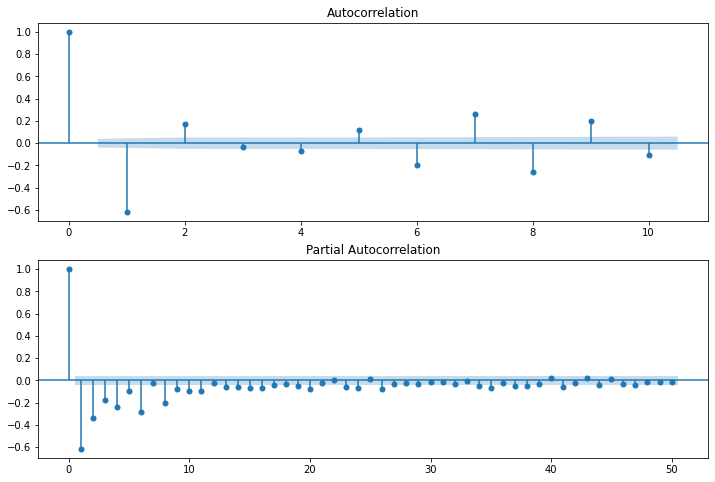

In [23]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(wt, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(wt, lags=50, ax=ax2)

In [37]:
X = Apple['Close']
size = int(len(X) * 0.66)
# size = 3
train = X[0:size]
test = X[size:len(X)]
l = len(test)
history = [x for x in train]
predictions = list()
# for i in range()
print(history[-1])
for t in range(size,len(X)):
	model = ARIMA(history, order=(2,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
# test = Apple['Close']
# test = test[size:len(test)]
# predictions = e**(predictions)
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
i = 0
Temp = np.zeros(len(test))
for t in test:
	Temp[i] = t
	i += 1

2101.49
predicted=2093.310373, expected=2102.310000
predicted=2104.920571, expected=2108.580000
predicted=2106.403625, expected=2124.200000
predicted=2121.212253, expected=2122.850000
predicted=2123.160846, expected=2109.990000
predicted=2110.364967, expected=2121.240000
predicted=2117.084215, expected=2100.440000
predicted=2103.131295, expected=2096.290000
predicted=2093.596746, expected=2084.430000
predicted=2084.390677, expected=2094.110000
predicted=2090.257773, expected=2108.860000
predicted=2106.296614, expected=2105.200000
predicted=2105.756995, expected=2080.150000
predicted=2082.051422, expected=2079.280000
predicted=2075.719591, expected=2092.830000
predicted=2089.450937, expected=2095.840000
predicted=2095.317741, expected=2114.070000
predicted=2110.394771, expected=2109.600000
predicted=2110.598257, expected=2111.730000
predicted=2109.674432, expected=2107.390000
predicted=2106.878965, expected=2120.790000
predicted=2117.134610, expected=2123.480000
predicted=2123.016036, e

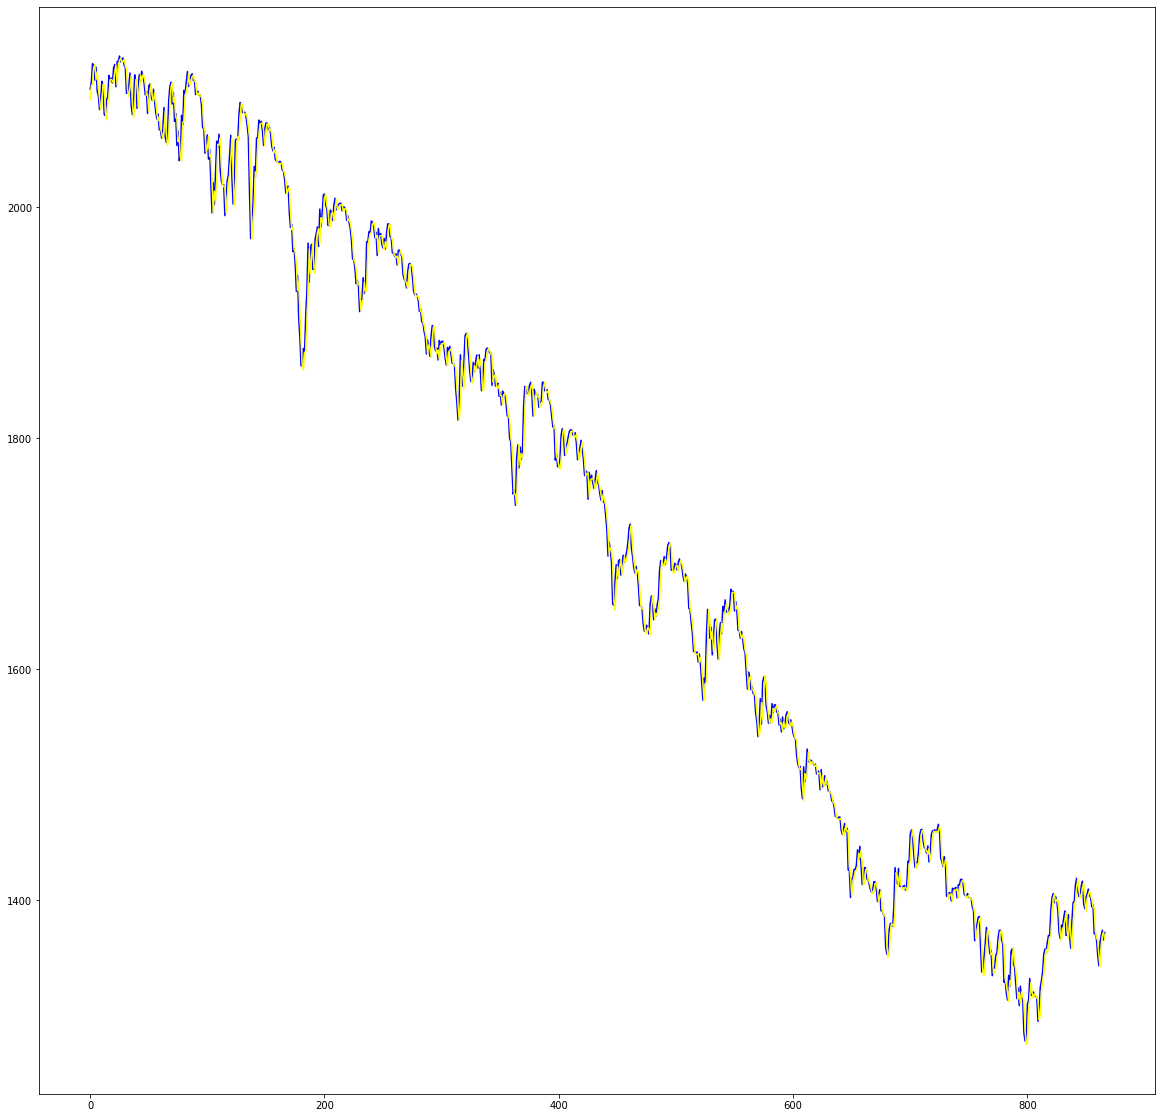

In [39]:
# print(len(Temp))
# print(len(predictions))
plt.figure(figsize=(20,20))
plt.plot(Temp, color = 'blue')
plt.plot(predictions,color='yellow')
plt.show()

In [32]:
SnP = pd.read_csv('Data.csv')
print(SnP)



            Date    Close     Open     High      Low   Output
0     02/24/2022  4288.70  4155.77  4294.73  4114.65  4221.51
1     02/23/2022  4225.50  4324.93  4341.51  4221.51  4267.11
2     02/22/2022  4304.76  4332.74  4362.12  4267.11  4327.22
3     02/18/2022  4348.87  4384.57  4394.60  4327.22  4373.81
4     02/17/2022  4380.26  4456.06  4456.06  4373.81  4429.68
...          ...      ...      ...      ...      ...      ...
2545  03/05/2012  1364.33  1369.59  1369.59  1359.13  1366.42
2546  03/02/2012  1369.63  1374.09  1374.53  1366.42  1365.90
2547  03/01/2012  1374.09  1365.90  1376.17  1365.90  1363.81
2548  02/29/2012  1365.68  1372.20  1378.04  1363.81  1365.97
2549  02/28/2012  1372.18  1367.56  1373.09  1365.97  1354.92

[2550 rows x 6 columns]


# Artificial Neural Network

In [3]:
import tensorflow as tf
from tensorflow import keras

In [33]:
Average = SnP['Open'] + SnP['Close'] + SnP['High'] + SnP['Low']
Average = Average/4
Returns = [0]
Adjusted_Close_Price = SnP['Close']
for i in range(1,len(Adjusted_Close_Price)):
    Returns.append(Adjusted_Close_Price[i]/Adjusted_Close_Price[i-1])
Returns = np.array(Returns).reshape(-1,1)

In [35]:
MAX_RETURNS = max(Returns)
MAX_OPEN = max(SnP['Open'])
MAX_CLOSE = max(SnP['Close'])
MAX_HIGH = max(SnP['High'])
MAX_LOW = max(SnP['Low'])
MAX_AVERAGE = max(Average)
print(MAX_CLOSE)

4796.56


In [64]:
# Normalizing values
Returns = Returns/(MAX_RETURNS + 1)
Average = Average/( MAX_AVERAGE+1)
SnP['Open'] = SnP['Open']/ (MAX_OPEN + 1)
SnP['Close'] = SnP['Close']/(MAX_CLOSE +1)
SnP['High'] = SnP['High']/ (MAX_HIGH + 1)
SnP['Low'] = SnP['Low']/(MAX_LOW+1)

In [65]:
x_train = [SnP['Close'][: 1275] , SnP['Open'][: 1275], SnP['High'][: 1275], SnP['Low'][: 1275]]
x_train = np.array(x_train).T
y_train = [SnP['Close'][1 : 1276]]
y_train = np.array(y_train).T
# print(len(x_train), len(y_train))
x_test = [SnP['Close'][1275 : 2549] , SnP['Open'][1275 : 2549], SnP['High'][1275 : 2549], SnP['Low'][1275 : 2549]]
y_test = [SnP['Close'][1276 :]]
y_test = np.array(y_test).T
x_test = np.array(x_test).T

In [73]:
# # train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# # test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

In [66]:
model = keras.Sequential([
    keras.layers.InputLayer(4),  # input layer (1)
    keras.layers.Dense(15, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1) # output layer (3)
])

In [83]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy', metrics='accuracy')

In [84]:

# print(x_train[0])
# for i in range(len(x_train)):
#     if y_train[i] == 0:
#         print(y_train[i])

model.fit(x_train, y_train, epochs=10)  

Epoch 1/10
40/40 [==============================] - 0s 889us/step - loss: 0.5858 - accuracy: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 0s 895us/step - loss: 0.5859 - accuracy: 0.0000e+00
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.0000e+00
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.0000e+00
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.0000e+00
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.0000e+00
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.0000e+00
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.0000e+00
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.0000e+00
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.591

In [85]:
model.evaluate(x_test,y_test, verbose=1)
predictions = model.predict(x_test)
# print(y_test)
print(predictions)

40/40 [==============================] - 0s 668us/step - loss: 0.6650 - accuracy: 0.0000e+00
[[0.46927303]
 [0.46795437]
 [0.468641  ]
 ...
 [0.28974116]
 [0.28927308]
 [0.2892408 ]]


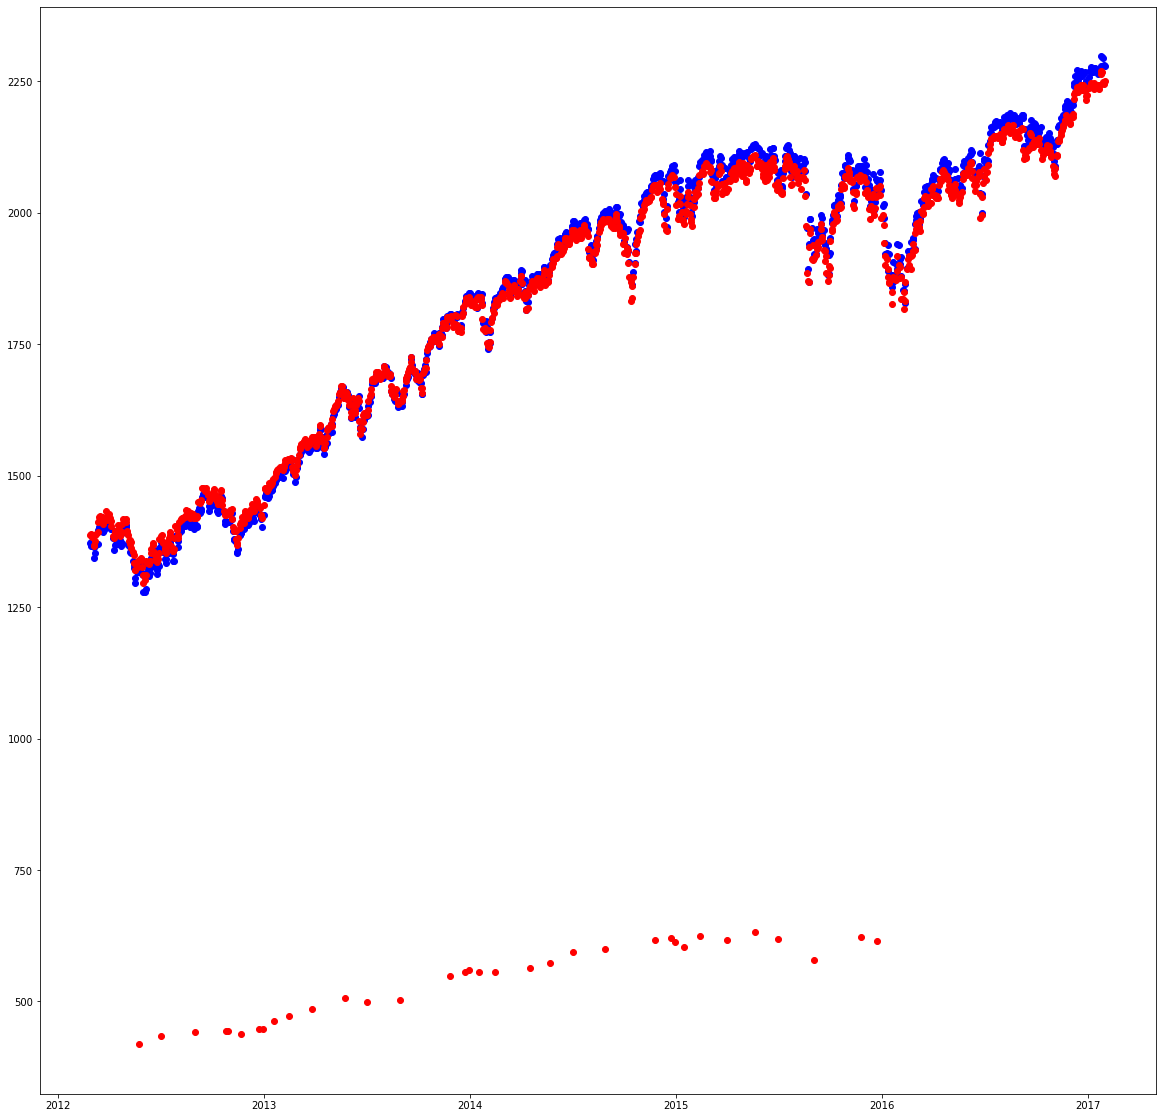

In [90]:
date_time = pd.to_datetime(SnP['Date'])
plt.figure(figsize=(20,20))
plt.scatter(date_time[1276 :],y_test*(MAX_CLOSE+1),color = 'b' )
plt.scatter(date_time[1276 :],predictions*(MAX_CLOSE+1), color = 'r')
plt.show()